<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-the-ansatz-state-quantum-circuit-for-a-tree-graph" data-toc-modified-id="Generate-the-ansatz-state-quantum-circuit-for-a-tree-graph-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate the ansatz state quantum circuit for a tree graph</a></span></li><li><span><a href="#Generate--the-line-graph" data-toc-modified-id="Generate--the-line-graph-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate  the line graph</a></span></li><li><span><a href="#Simplify-line-graph" data-toc-modified-id="Simplify-line-graph-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simplify line graph</a></span><ul class="toc-item"><li><span><a href="#Simplification-iterations-=-1" data-toc-modified-id="Simplification-iterations-=-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simplification iterations = 1</a></span></li><li><span><a href="#Simplification-iterations-=-2" data-toc-modified-id="Simplification-iterations-=-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Simplification iterations = 2</a></span></li></ul></li></ul></div>

In [1]:
import qtensor
import networkx as nx
import matplotlib.pyplot as plt

# Line graph demonstration
## Generate the ansatz state quantum circuit for a tree graph

In [229]:
p = 3
B = qtensor.toolbox.bethe_graph(p=p, degree=3)

In [230]:
# exact values don't matter, since we are interested in the structure of the TN only
gamma, beta = [0.1]*p, [0.2]*p
comp = qtensor.DefaultQAOAComposer(B, gamma=gamma, beta=beta)
comp.energy_expectation_lightcone((0, 1))
TN = qtensor.optimisation.QtreeTensorNet.from_qtree_gates(comp.circuit)

## Generate  the line graph

In [231]:
LG = TN.get_line_graph()

In [241]:
def draw_graph(G, reverse_rotate=True):
    fig = plt.figure(figsize=(8, 6))
    la = nx.kamada_kawai_layout(G)
    # -- rotate the layout for a more symmetricical view, based on SVD
    X = np.array(list(la.values()))
    np.cov(X.T)
    e_val, e_vec = np.linalg.eig(np.cov(X.T))
    # ---- swap the order of the eigenvectors
    if reverse_rotate:
        e_vec = e_vec[:, ::-1]
    new_locs = e_vec.T.dot(X.T).T
    # --

    pos = {k:v for k, v in zip(la.keys(), new_locs)}
    
    nx.draw(G, pos=pos, node_size=70, node_color='b')
    #nx.draw_kamada_kawai(G, node_size=20, node_color='b')

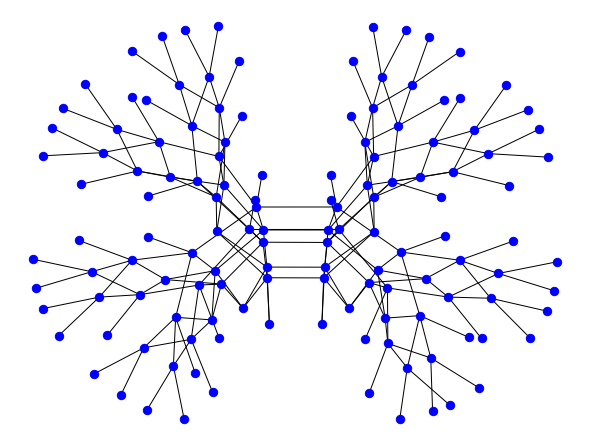

In [233]:
draw_graph(LG)

## Simplify line graph

In [234]:
import qtree

### Simplification iterations = 1

In [235]:
LGs = LG.copy()
simplification_level = 1
for i in range(simplification_level):
    LGs = qtree.graph_model.peo_calculation.get_simple_graph(LGs)
    x = qtensor.utils.eliminate_low_degrees(LGs)
    print('removed', x)

removed 62


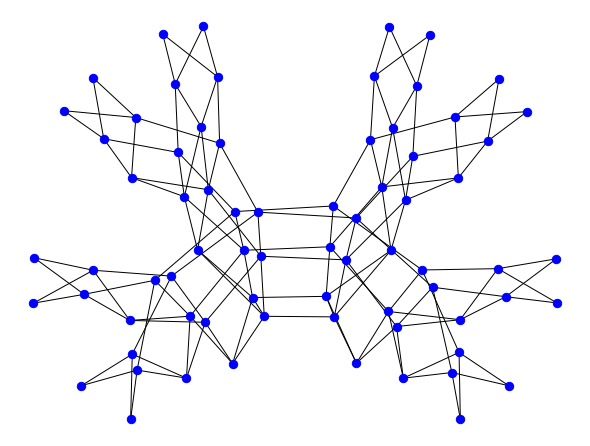

In [236]:
draw_graph(LGs, reverse_rotate=False)
plt.savefig('pdf/lg_p3_s1.pdf')

---

### Simplification iterations = 2

In [237]:
LGs = LG.copy()
simplification_level = 2
for i in range(simplification_level):
    LGs = qtree.graph_model.peo_calculation.get_simple_graph(LGs)
    x = qtensor.utils.eliminate_low_degrees(LGs)
    print('removed', x)

removed 62
removed 16


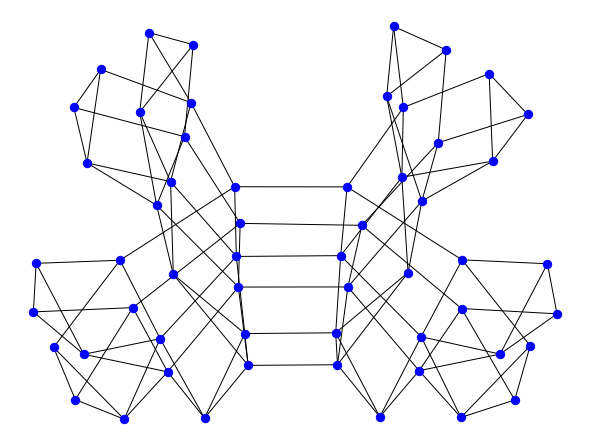

In [238]:
draw_graph(LGs, reverse_rotate=False)